In [1]:
%matplotlib inline
#TODO: bring all parameters (e.g length of z) into 1 cell + restructure code maybe

import os
import pickle as pkl
import numpy as np
import torch
import matplotlib.pyplot as plt

In [59]:
'''
Provide the timestamp corresponding to the modoel you want to visualize for

Example bases we have:
# img_z_base = 'img_z/img_z_2020-04-23 04:25:50.846734_epoch_{}.pkl'
# img_z_base = 'img_z/img_z_2020-04-29 00:26:01.611844_epoch_{}_128.pkl'
# img_z_base = 'img_z/img_z_2020-04-29 02:55:56.243997_epoch_{}_128.pkl'
# img_z_base = 'img_z/img_z_2020-04-29 03:47:23.294050_epoch_{}_128.pkl'
# img_z_base = 'img_z/img_z_2020-04-29 04:32:16.714921_epoch_{}_128.pkl'
'''
# timestamp = '2020-05-02 04:48:15.406380' #CAN
# timestamp = '2020-05-03 01:35:43.639239' #DCGAN
timestamp = '2020-05-03 18:13:26.043295' #DCGAN2
# timestamp = '2020-05-04 06:44:41.576759' #DCGAN2 SGD
# timestamp = '2020-05-09 18:19:47.927973' #DCGAN single class 2 gen cycles
# timestamp = '2020-05-09 20:14:48.957774' #DCGAN single class 1 gen cycle
crop_size = 128
img_z_base = 'img_z/img_z_' + timestamp + '_epoch_{}_' + str(crop_size) + '.pkl'

img_z_base = 'img_z/img_z_2020-05-03 18:13:26.043295_epoch_{}_128_continue_epoch_300.pkl' # CAN after DCGAN

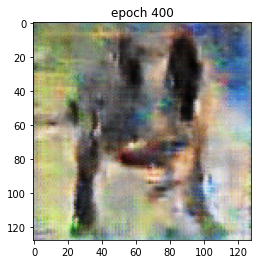

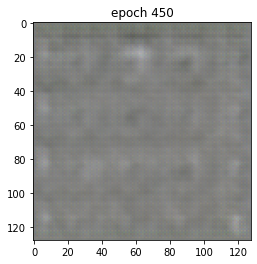

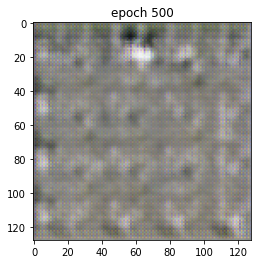

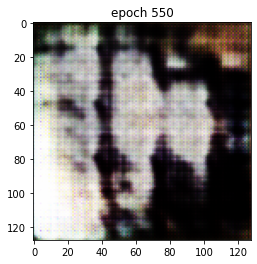

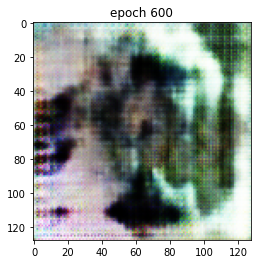

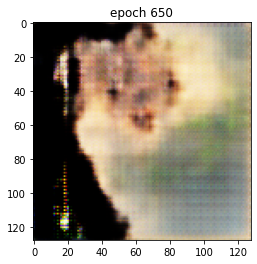

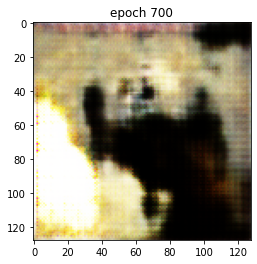

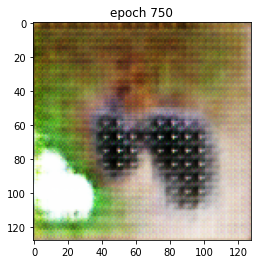

In [71]:
'''
Use this cell to visualize the first generated image for epochs within the range. 
'''

start_epoch = 400
end_epoch = 750
step = 50



for epoch in range(start_epoch, end_epoch+1, step):
    with open(img_z_base.format(epoch), 'rb') as f:
        img_z = pkl.load(f)
        plt.figure()
        plt.imshow(np.moveaxis(img_z[0].numpy() * 0.5 + 0.5, 0, -1))
        plt.title('epoch {}'.format(epoch))

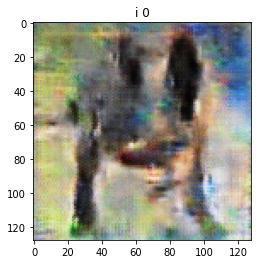

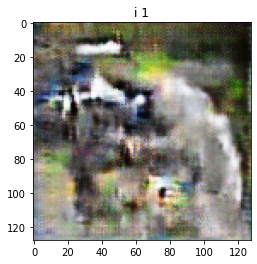

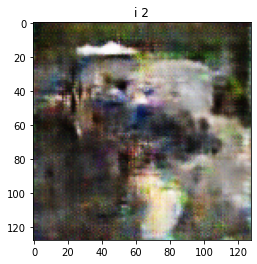

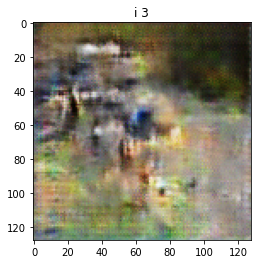

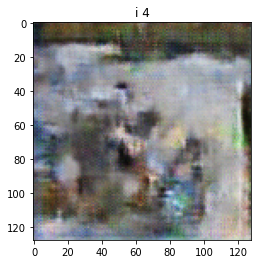

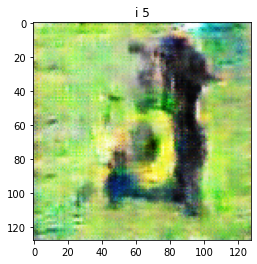

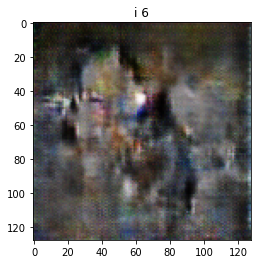

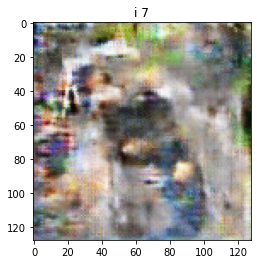

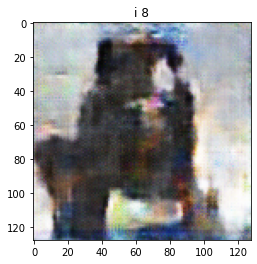

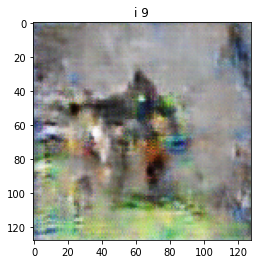

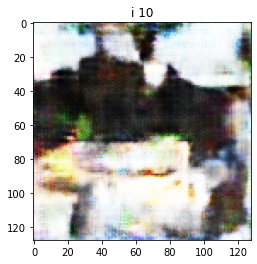

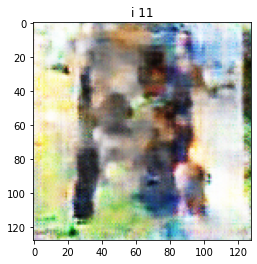

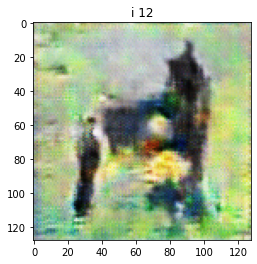

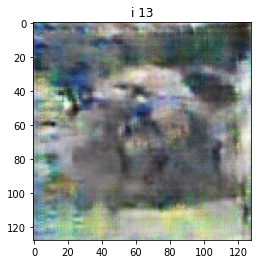

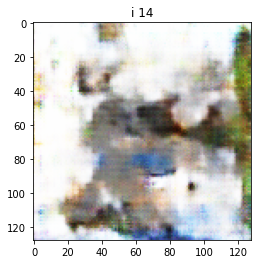

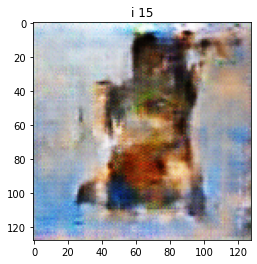

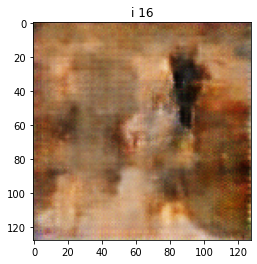

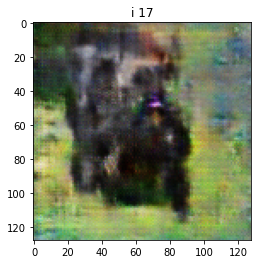

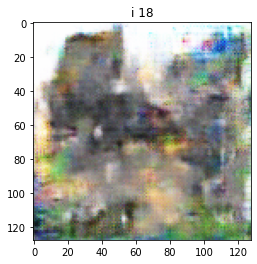

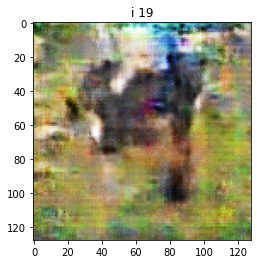

In [57]:
'''
Use this cell to visualize generated images from a specific epoch
'''

epoch = 400


img_z = img_z_base.format(epoch)

with open(img_z, 'rb') as f:
    img_z = pkl.load(f)
for i in range(20):
    plt.figure()
    plt.imshow(np.moveaxis(img_z[i].numpy() * 0.5 + 0.5, 0, -1))
    plt.title('i {}'.format(i))

In [62]:
'''
Use this cell to plot G_loss and D_loss evolution
'''
# G_loss_path = 'losses/G_losses' + timestamp + '_' + str(crop_size) + '.pkl'
# D_loss_path = 'losses/D_losses' + timestamp + '_' + str(crop_size) + '.pkl'
G_loss_path = 'losses/G_losses' + timestamp + '_' + str(crop_size) + '_continue_epoch_300.pkl'
D_loss_path = 'losses/D_losses' + timestamp + '_' + str(crop_size) + '_continue_epoch_300.pkl'

G_losses = pkl.load(open(G_loss_path, "rb"))
D_losses = pkl.load(open(D_loss_path, "rb"))
# epochs = list(range(1, len(G_losses)+1))
epochs = list(range(301, len(G_losses)+301))

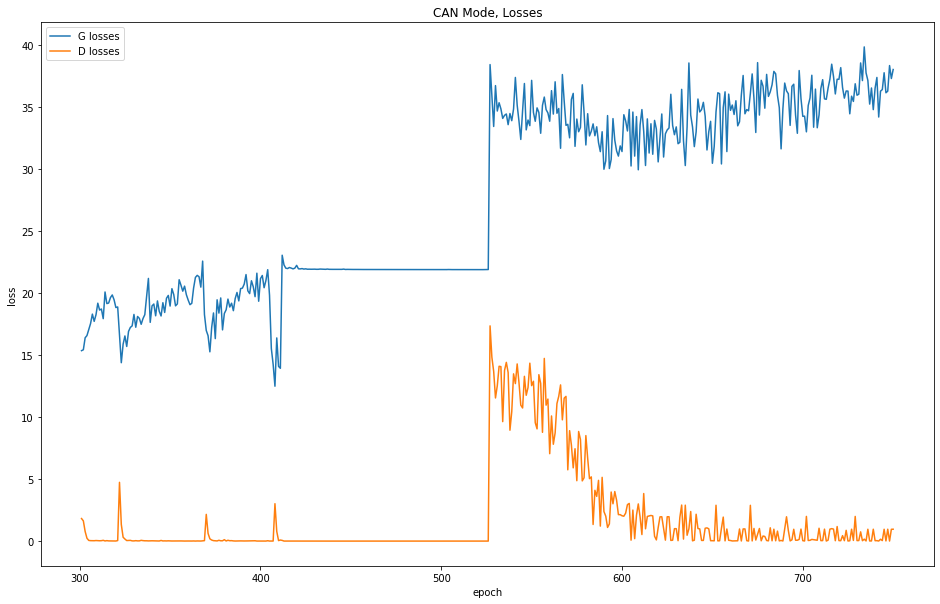

In [63]:
plt.figure(figsize=(16,10))
plt.plot(epochs, G_losses, label='G losses')
plt.plot(epochs, D_losses, label='D losses')
plt.title('CAN Mode, Losses')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [41]:
for i, v in enumerate(G_losses[300:350]):
    print(i, v)

0 6.677377700805664
1 5.891979694366455
2 6.953213214874268
3 6.973811626434326
4 5.005751609802246
5 6.586325168609619
6 7.536655426025391
7 6.911807060241699
8 6.146583080291748
9 6.513980865478516
10 6.376159191131592
11 1.1970245838165283
12 3.9148972034454346
13 4.232875823974609
14 3.5603740215301514
15 3.985154151916504
16 4.758713245391846
17 4.539371967315674
18 4.295764923095703
19 4.476984024047852
20 4.732699394226074
21 4.869865894317627
22 5.072115898132324
23 5.810582637786865
24 5.107888698577881
25 4.639139652252197
26 6.317028045654297
27 4.536665916442871
28 6.066504001617432
29 5.735258102416992
30 6.061115741729736
31 5.506143093109131
32 5.747499465942383
33 5.851322650909424
34 5.957626819610596
35 5.863674163818359
36 6.151859283447266
37 7.058320999145508
38 6.005711078643799
39 6.7982048988342285
40 6.547775745391846
41 5.662797451019287
42 5.233046531677246
43 6.989927768707275
44 7.04104471206665
45 5.89336633682251
46 6.8254241943359375
47 7.341403961181641